#### Tala Tayebi
#### Analysis & Visualizations
#### Github Repo: https://github.com/talajune/DSCI510_FinalProject

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [72]:
data = pd.read_csv('./finalproject_data_sample_100rows.csv')

In [74]:
# Drop Columns I won't use for Analysis / Viz 
data = data.drop(['tourists','gdp_growth', 'pop_growth', 'surface_area','threatened_species', 'employment_agriculture'], axis=1)

In [75]:
# dropping rows that have na values 
data = data.dropna()

In [76]:
# data.shape
data.columns

Index(['Overall rank', 'name', 'gdp', 'sex_ratio', 'life_expectancy_male',
       'unemployment', 'homicide_rate', 'secondary_school_enrollment_female',
       'co2_emissions', 'life_expectancy_female',
       'post_secondary_enrollment_female', 'post_secondary_enrollment_male',
       'infant_mortality', 'population', 'urban_population',
       'secondary_school_enrollment_male', 'pop_density', 'internet_users',
       'gdp_per_capita', 'fertility'],
      dtype='object')

In [77]:
data.shape

(90, 20)

In [78]:
data.describe()

,Overall rank,gdp,sex_ratio,life_expectancy_male,unemployment,homicide_rate,secondary_school_enrollment_female,co2_emissions,life_expectancy_female,post_secondary_enrollment_female,post_secondary_enrollment_male,infant_mortality,population,urban_population,secondary_school_enrollment_male,pop_density,internet_users,gdp_per_capita,fertility
count,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,52.333333,7.731500e+05,101.836667,73.417778,6.310000,6.147778,98.086667,258.928889,78.522222,61.507778,47.298889,12.934444,5.033451e+04,69.496667,97.384444,327.495556,69.725556,22934.200000,2.157778
std,32.368663,2.618062e+06,24.790731,6.378697,4.406687,10.857641,25.299022,1087.758269,6.518251,30.182234,23.479489,14.951466,1.603767e+05,18.213907,23.834499,1163.582846,21.334761,24440.812235,0.903051
min,1.000000,5.507000e+03,84.500000,53.300000,0.100000,0.200000,39.100000,1.500000,55.100000,6.200000,7.000000,1.300000,3.410000e+02,20.200000,41.700000,2.100000,15.500000,826.600000,1.200000
25%,24.500000,4.111950e+04,95.500000,70.075000,3.800000,0.900000,88.500000,10.800000,76.425000,39.350000,32.075000,3.125000,5.175750e+03,56.300000,87.925000,38.000000,56.350000,5256.425000,1.600000
50%,50.500000,1.658200e+05,98.100000,74.000000,5.150000,1.600000,101.200000,44.900000,79.700000,66.250000,46.950000,6.500000,1.016800e+04,68.800000,100.250000,99.150000,74.550000,11857.050000,1.800000
75%,80.750000,4.218210e+05,100.350000,78.775000,7.175000,4.900000,108.800000,120.300000,83.675000,81.975000,64.600000,17.450000,3.447775e+04,83.425000,110.975000,194.275000,86.400000,34353.575000,2.400000
max,113.000000,2.058022e+07,302.400000,81.800000,28.500000,52.000000,167.800000,9257.900000,87.500000,137.000000,136.200000,62.100000,1.439324e+06,100.000000,159.000000,8357.600000,99.700000,117369.500000,5.400000


In [79]:
#data.plot.scatter(x = 'Overall rank', y = 'homicide_rate', s = 'homicide_rate', c = 'red');

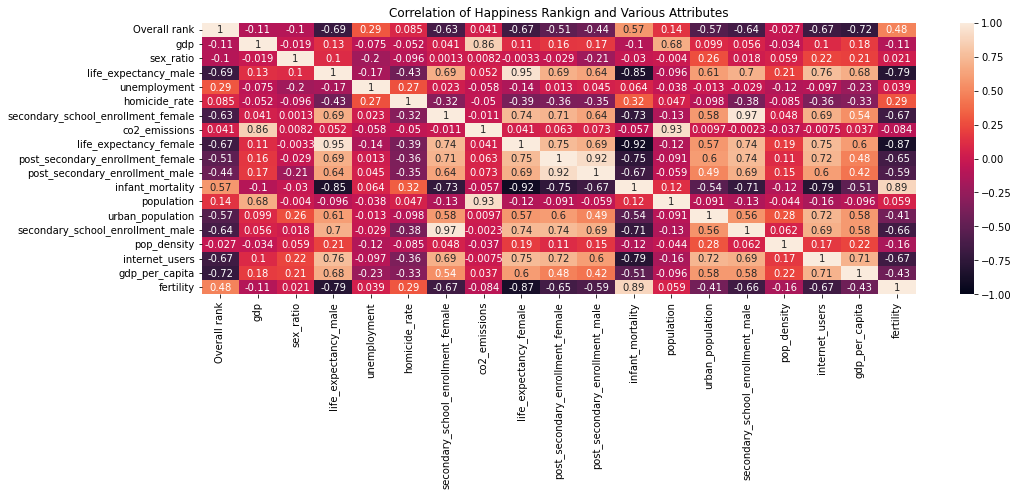

In [95]:
# get correlation coeffiecicent between variables
correlation_data = data.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation_data, vmin=-1, vmax=1,annot=True, color='red', linewidths=0)
plt.title('Correlation of Happiness Rankign and Various Attributes')
# correlation_data.style.background_gradient(cmap='summer')

plt.savefig('heatmap_corelation.png')

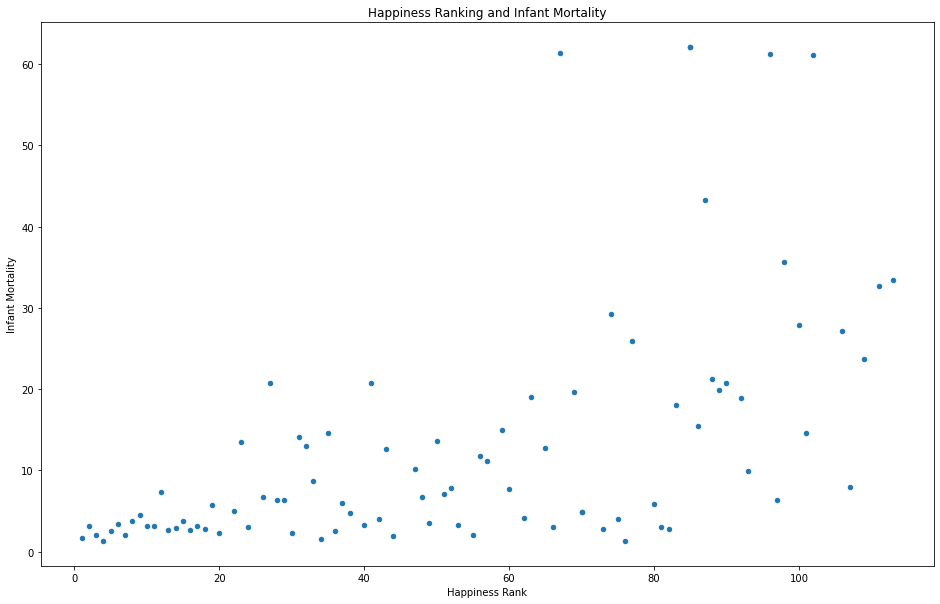

<Figure size 432x288 with 0 Axes>

In [96]:
# looks like Overall Rank and infant_mortality have the highest correlation, so ill make a scatterplot
data.plot(kind = "scatter", x = "Overall rank", y = "infant_mortality", figsize = (16,10))
plt.xlabel("Happiness Rank")
plt.ylabel("Infant Mortality")
plt.title("Happiness Ranking and Infant Mortality")
plt.show()

plt.savefig('scatterplot_happiness_infant_mortality.png')
# doesn't look to be that correlated. I am going to go back to the data collection phase and include more columns/features so that I can find better correlation between happiness and different attributes. 

In [98]:
fig = px.choropleth(
    data_frame = data,
    locations="name",
    color="Overall rank",
    locationmode='country names',
    title = "Happiness Rank Score by Country"
)
fig.show()

plt.savefig('Happiness_map.svg')

# Have to create a new dataframe in my data collection file that includes all the countries that were ranked in the World Happiness Report, not just the top 100.
# I will do this over the weekend. Correct / Finished Map TBD. 


<Figure size 432x288 with 0 Axes>